- LCS : 최장 공통 부분 수열 (Longest Common Subsequence)
- 두 수열이 주어졌을 때, 모두의 부분 수열이 되는 수열 중 가장 긴 것

In [1]:
n = input()
m = input()

ACAYKP
CAPCAK


## 내가 생각한 방식

#### 집합의 조합으로 접근해보자

- 얻어 걸리라는 심산의 접근은 옳지 않다.
- 폐기

In [16]:
set(n) and set(m)

{'A', 'C', 'K', 'P'}

In [17]:
set(n) or set(m)

{'A', 'C', 'K', 'P', 'Y'}

In [20]:
n and m

'CAPCAK'

In [29]:
(n or m)

'ACAYKP'

#### 각 수열의 인덱스 정보가 필요하지 않을까?

- ACAYKP에서 두 개의 A는 다른 A로 판단해야 한다.
- 딕셔너리는 중복이 허용되지 않는다.
- 이차원 리스트로 만들자.

In [40]:
n_idx = [x for x in range(len(n))]
m_idx = [x for x in range(len(m))]

In [41]:
n_dic, m_dic = [], []

for x, y in zip(n, n_idx):
    n_dic.append([x, y])
    
for x, y in zip(m, m_idx):
    m_dic.append([x, y])
    
n_dic, m_dic

([['A', 0], ['C', 1], ['A', 2], ['Y', 3], ['K', 4], ['P', 5]],
 [['C', 0], ['A', 1], ['P', 2], ['C', 3], ['A', 4], ['K', 5]])

- 이제 뭐 어쩔티비...?

## 정답

### 풀이 1

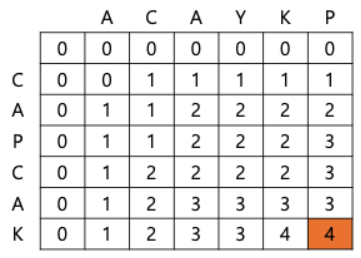

- 2차원 배열을 만듦.
- 2개의 문자열의 현재 시점에서 LCS값을 구함.
- 알파벳을 순회할때
    - 같은 알파벳인 경우, 해당 위치에서는 글자를 추가하기 전의 LCS 값보다 1을 더해 저장.
    - 다른 알파벳인 경우, 이전까지 비교한 값 중 최대값을 구함.
    - ex) CAP와 ACA
        - CAP, AC = 1과 CA, ACA = 2를 비교해 2인 것을 채택

In [42]:
word1, word2 = input(), input()
h, w = len(word1), len(word2)

ACAYKP
CAPCAK


In [43]:
# h * w 크기의 dp 테이블을 만들자
dp = [[0] * (w+1) for _ in range(h+1)]
dp

[[0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0]]

In [44]:
for i in range(1, h + 1):
    for j in range(1, w + 1):
        if word1[i-1] == word2[j-1]:
            dp[i][j] = dp[i-1][j-1] + 1
        else:
            dp[i][j] = max(dp[i][j-1], dp[i-1][j])
            
print(dp[-1][-1])

4


### 풀이 2

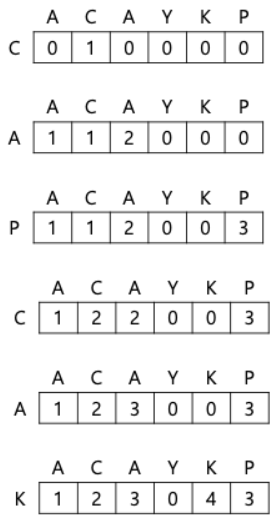

- 2중 for문을 사용하나 dp 테이블을 1차원 배열로 사용한다.
- 시간, 공간 복잡도를 절약.

In [45]:
word1, word2 = input(), input()
h, w = len(word1), len(word2)

ACAYKP
CAPCAK


In [46]:
dp = [0] * w
dp

[0, 0, 0, 0, 0, 0]

In [47]:
for i in range(h):
    cnt = 0
    for j in range(w):
        if cnt < dp[j]:
            cnt = dp[i]
        elif word1[i] == word2[j]:
            dp[j] = cnt + 1
            
print(max(dp))

3
